### Analyzing CMF pipeline metadata for Exatrack Pipeline (stored with CMF tracking layer queried with CMF query layer).

In [5]:
import pandas as pd
from cmflib import cmfquery
from IPython.display import display, HTML
import json 
import ast

##### Initialize the library and get all the stages in the pipeline

Point the library to the metadata file. <br>
`get_pipeline_stages` - get all the different stages in the pipeline.

In [6]:
query = cmfquery.CmfQuery("./mlmd")
stages = query.get_pipeline_stages("exatrkx")
display(stages)

['1.TrainMetricLearning',
 '2.MetricLearningInference',
 '3.TrainGNN',
 '4.GNNInference',
 '5.BuildTrackCandidates',
 '6.EvaluateTrackCandidates']

##### Query the Executions for **1. Train Metric Learning**

In [7]:
pd.options.display.max_colwidth = 220
executions = query.get_all_executions_in_stage('1.TrainMetricLearning')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,activation,cell_channels,emb_dim,emb_hidden,factor,hparams,id,input_dir,...,r_test,r_train,r_val,randomisation,regime,spatial_channels,train_split,true_edges,warmup,weight
0,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 1024, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",168,datasets/quickstart_example_1GeV,...,0.2,0.2,0.2,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
1,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 1024, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",162,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
2,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 2048, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",156,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
3,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 2048, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",150,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
4,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 2048, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",146,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
5,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 2048, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",140,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
6,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 1024, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",134,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
7,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 1024, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'o...",128,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
8,['run_cmf.py'],exatrkx,Tanh,9,12,512,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 512, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'ou...",122,datasets/quickstart_example_1GeV,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
9,['run_cmf.py'],exatrkx,Tanh,9,12,512,0.7,"{'activation': 'Tanh', 'cell_channels': 9, 'emb_dim': 12, 'emb_hidden': 512, 'factor': 0.7, 'input_dir': 'datasets/quickstart_example_1GeV', 'knn': 50, 'lr': 0.001, 'margin': 0.1, 'max_epochs': 30, 'nb_layer': 4, 'ou...",116,datasets/quickstart_example_1GeV,...,0.1,0.

##### Query the hyper parameters used for each execution in **1. Train Metric Learning**



In [8]:
appended_data = [] # Get a list to store individual df
data_dict = executions['hparams'] #Get the hparams
for i, v in data_dict.items(): # Length of the values will be the number of executions we have had    
    dict_new = ast.literal_eval(v) # convert the hparama string literal to a dictionary object
    dict_new_new = {}
    for k, v in dict_new.items(): #This is needed - Otherwise pandas while converting to dataframe will split each                               
        dict_new_new[k] = str(v)  # individula item in a dictionary value to seperate rows eg : train_test:[80,10,10]
                                  # into seperate rows, one with 80, next with 10 etc
    execution_id = executions.at[i, 'id']
    hp_df = pd.DataFrame.from_dict(dict_new_new, orient='index', columns=['execution-id - '+str(execution_id)]) 
    appended_data.append(hp_df)
appended_data = pd.concat(appended_data, axis=1, ignore_index=False)
display(appended_data)

,execution-id - 168,execution-id - 162,execution-id - 156,execution-id - 150,execution-id - 146,execution-id - 140,execution-id - 134,execution-id - 128,execution-id - 122,execution-id - 116,...,execution-id - 42,execution-id - 36,execution-id - 30,execution-id - 24,execution-id - 18,execution-id - 17,execution-id - 14,execution-id - 13,execution-id - 7,execution-id - 1
activation,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,...,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh,Tanh
cell_channels,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
emb_dim,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
emb_hidden,1024,1024,2048,2048,2048,2048,1024,1024,512,512,...,1024,1024,1024,1024,1024,1024,128,2048,2048,1024
factor,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
input_dir,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,...,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV,datasets/quickstart_example_1GeV
knn,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
lr,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
margin,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
max_epochs,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


##### Query the Executions in **2.Metric Learning Inference.**

In [9]:
#pd.options.display.max_colwidth = 220
executions = query.get_all_executions_in_stage('2.MetricLearningInference')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,activation,cell_channels,emb_dim,emb_hidden,factor,id,input_dir,knn,...,r_test,r_train,r_val,randomisation,regime,spatial_channels,train_split,true_edges,warmup,weight
0,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,169,datasets/quickstart_example_1GeV,50,...,0.2,0.2,0.2,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
1,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,163,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
2,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,157,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
3,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,151,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
4,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,147,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
5,['run_cmf.py'],exatrkx,Tanh,9,12,2048,0.7,141,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
6,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,135,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
7,['run_cmf.py'],exatrkx,Tanh,9,12,1024,0.7,129,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
8,['run_cmf.py'],exatrkx,Tanh,9,12,512,0.7,123,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2
9,['run_cmf.py'],exatrkx,Tanh,9,12,512,0.7,117,datasets/quickstart_example_1GeV,50,...,0.1,0.1,0.1,2,"['rp', 'hnm', 'norm']",3,"[80, 10, 10]",modulewise_true_edges,8,2


##### Query the executions in ***3.TrainGNN**

In [10]:
executions = query.get_all_executions_in_stage('3.TrainGNN')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,aggregation,cell_channels,datatype_names,datatype_split,edge_cut,factor,hidden,hidden_activation,...,noise,output_dir,patience,pt_background_min,pt_signal_min,regime,spatial_channels,truth_key,warmup,weight
0,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,128,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
1,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,128,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
2,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,256,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
3,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
4,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
5,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,32,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
6,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
7,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,32,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
8,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,256,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
9,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2


##### Query the Executions in **4. GNN Inference**

In [11]:
executions = query.get_all_executions_in_stage('4.GNNInference')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,aggregation,cell_channels,datatype_names,datatype_split,edge_cut,factor,hidden,hidden_activation,...,noise,output_dir,patience,pt_background_min,pt_signal_min,regime,spatial_channels,truth_key,warmup,weight
0,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,128,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
1,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,256,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
2,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
3,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
4,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,32,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
5,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
6,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,32,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
7,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,256,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
8,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,64,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2
9,['run_cmf.py'],exatrkx,sum_max,0,"['train', 'val', 'test']","[80, 10, 10]",0.5,0.7,32,SiLU,...,0,datasets/quickstart_gnn_processed,8,1.0,1.0,['pid'],3,pid_signal,10,2


##### Query the Executions in **5. Build Track Candidates**

In [12]:
executions = query.get_all_executions_in_stage('5.BuildTrackCandidates')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,id,output_dir,score_cut
0,['run_cmf.py'],exatrkx,166,datasets/quickstart_track_building_processed,0.9
1,['run_cmf.py'],exatrkx,160,datasets/quickstart_track_building_processed,0.9
2,['run_cmf.py'],exatrkx,154,datasets/quickstart_track_building_processed,0.9
3,['run_cmf.py'],exatrkx,144,datasets/quickstart_track_building_processed,0.9
4,['run_cmf.py'],exatrkx,138,datasets/quickstart_track_building_processed,0.9
5,['run_cmf.py'],exatrkx,132,datasets/quickstart_track_building_processed,0.9
6,['run_cmf.py'],exatrkx,126,datasets/quickstart_track_building_processed,0.9
7,['run_cmf.py'],exatrkx,120,datasets/quickstart_track_building_processed,0.9
8,['run_cmf.py'],exatrkx,114,datasets/quickstart_track_building_processed,0.9
9,['run_cmf.py'],exatrkx,108,datasets/quickstart_track_building_processed,0.9


##### Query the Executions in **6. Evaluate Track Candidates**

In [15]:
executions = query.get_all_executions_in_stage('6.EvaluateTrackCandidates')
display(executions.loc[:, ~executions.columns.isin(['Context_ID', 'Context_Type', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                    'Pipeline_id'])])


,Execution,Pipeline_Type,id,matching_fraction,matching_style,max_eta,min_particle_length,min_pt,min_track_length,output_dir
0,['run_cmf.py'],exatrkx,167,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
1,['run_cmf.py'],exatrkx,161,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
2,['run_cmf.py'],exatrkx,155,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
3,['run_cmf.py'],exatrkx,145,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
4,['run_cmf.py'],exatrkx,139,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
5,['run_cmf.py'],exatrkx,133,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
6,['run_cmf.py'],exatrkx,127,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
7,['run_cmf.py'],exatrkx,121,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
8,['run_cmf.py'],exatrkx,115,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation
9,['run_cmf.py'],exatrkx,109,0.5,ATLAS,4,3,1,3,datasets/quickstart_evaluation


##### Get the execution metrics of all executions of the stage **6.EvaluateTrackCandidates**. 



In [16]:
executions = query.get_all_executions_in_stage('6.EvaluateTrackCandidates')
print(type(executions))
appended_data = []
for index, row in executions.iterrows():
    #print(type(row))
    execution_id = row['id']
    artifacts = query.get_all_artifacts_for_execution(execution_id)
    appended_data.append(artifacts.loc[artifacts['type'] == 'Metrics'])
#display(artifacts)
appended_data = pd.concat(appended_data, axis=0, ignore_index=False)
colums_drop = ['Commit','create_time_since_epoch', 'git_repo', 'last_update_time_since_epoch', 'metrics_name', 'uri' ]
metrics_data = appended_data.drop(colums_drop, axis=1)
display(metrics_data)

<class 'pandas.core.frame.DataFrame'>


,Duplication Rate,Efficiency,Fake Rate,Number of duplicate reconstructed particles,Number of matched tracks,Number of particles,Number of reconstructed particles,Number of tracks,event,id,name,type
2,0.046519,0.963517,0.006463,5117.0,115147.0,114164.0,109999.0,115896.0,OUTPUT,4273,metrics:dc6477bc-3b65-11ed-95ff-d4c9efcecfde:167,Metrics
2,0.060911,0.929128,0.012319,6461.0,112562.0,114164.0,106073.0,113966.0,OUTPUT,4123,metrics:99e4583a-3b5b-11ed-a737-d4c9efcecfde:161,Metrics
2,0.056222,0.962677,0.005745,6179.0,116117.0,114164.0,109903.0,116788.0,OUTPUT,3973,metrics:350906e2-3b54-11ed-a737-d4c9efcecfde:155,Metrics
2,0.071907,0.902158,0.016792,7406.0,110431.0,114164.0,102994.0,112317.0,OUTPUT,3675,metrics:ad7be148-3aab-11ed-8635-d4c9efcecfde:145,Metrics
2,0.049935,0.954259,0.007615,5440.0,114417.0,114164.0,108942.0,115295.0,OUTPUT,3525,metrics:45d3cbbe-3aa6-11ed-8635-d4c9efcecfde:139,Metrics
2,0.066049,0.919309,0.014685,6932.0,111916.0,114164.0,104952.0,113584.0,OUTPUT,3375,metrics:61df6156-3aa1-11ed-8635-d4c9efcecfde:133,Metrics
2,0.042863,0.972951,0.003903,4761.0,115867.0,114164.0,111076.0,116321.0,OUTPUT,3225,metrics:d66cec28-3a9c-11ed-8635-d4c9efcecfde:127,Metrics
2,0.049328,0.942732,0.010735,5309.0,112980.0,114164.0,107626.0,114206.0,OUTPUT,3075,metrics:8ce17a66-3a96-11ed-8635-d4c9efcecfde:121,Metrics
2,0.065862,0.910217,0.016988,6844.0,110809.0,114164.0,103914.0,112724.0,OUTPUT,2925,metrics:c30edbba-3a91-11ed-8635-d4c9efcecfde:115,Metrics
2,0.043415,0.956939,0.007546,4743.0,114030.0,114164.0,109248.0,114897.0,OUTPUT,2775,metrics:4b73185e-3a8d-11ed-8635-d4c9efcecfde:109,Metrics


### Get all the hyperparameters from the previous stages for each execution metric


In [17]:
import numpy as np
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 500)

combined_dfs = []
prev = None
for name in metrics_data.name.values: #metrics
    df = query.get_all_parent_executions(name) ### get all the executions(lineage of executions) of a particular artifact
    df = df.loc[:, ~df.columns.isin(['Context_ID', 'Git_End_Commit', 'Git_Repo', 'Git_Start_Commit', 
                                  'Pipeline_id', 'id'])] #filter out cmf meta columns
    metrics_df = query.get_artifact(name)
    renamed_dflist = []
    renamed_dflist.append(metrics_df)
    dfList = []
    context_list = []
    for i in range(0, df.shape[0], 1):
        ct_type = df[i:i+1]['Context_Type'] #Filtering out duplicate executions from the same stage. This is hack, because of  
                                            # inaccurate logging
        if str(ct_type.values[0]) in context_list: #This is a hack to work around an issue in logging
            continue
        context_list.append(df[i:i+1]['Context_Type'].values[0])
        dfList.append(df[i:i+1])

    for df in dfList:
        df = df.add_prefix("("+df.Context_Type.values[0]+") ") #rename all properties with the prefix as the stage name.
        renamed_dflist.append(df)                              # This is to identify properties that have same name from the 
                                                               # different stages
        
    collated_df = pd.concat(renamed_dflist, axis=0)
    
    df_new = collated_df.transpose()    
    stacked_df = df_new.stack(dropna=True).reset_index(level=1, drop=True).to_frame() # Stack the dataframes from the various stages
    combined_dfs.append(stacked_df)                         # On top of each other to create a single column for a metrics 
combined_table = pd.concat(combined_dfs, axis=1, ignore_index=True)      #Single view all the metrics , each column is the metrics and its hyper parameters              

rslt_df = combined_table
rslt_df = rslt_df.transpose()

nunique = rslt_df.nunique()  # Get the number of unique values
cols_to_drop = nunique[nunique == 1].index # Indexes with number of unique value is 1, ie all the executions had same value
rslt_df  = rslt_df.drop(cols_to_drop, axis=1) # drop those properties which are the same
cols_to_drop = ['create_time_since_epoch', 'last_update_time_since_epoch', '(Train1) hparams', 'uri', 'name', 'metrics_name' ]
rslt_df  = rslt_df.drop(cols_to_drop, axis=1)
rslt_df = rslt_df[~(rslt_df['Efficiency'] <0.2)] #filter out really bad runs
display(rslt_df)

,id,Number of duplicate reconstructed particles,Efficiency,Number of tracks,Number of reconstructed particles,Fake Rate,Number of matched tracks,Duplication Rate,(TrainGNN) hidden,(TrainGNN) nb_node_layer,(InferGNN) hidden,(InferGNN) nb_node_layer,(Train1) emb_hidden,(Train1) nb_layer,(Train1) r_test,(Train1) r_train,(Train1) r_val
0,4273.0,5117.0,0.963517,115896.0,109999.0,0.006463,115147.0,0.046519,128.0,3.0,128.0,3.0,1024.0,4.0,0.2,0.2,0.2
1,4123.0,6461.0,0.929128,113966.0,106073.0,0.012319,112562.0,0.060911,256.0,3.0,256.0,3.0,1024.0,4.0,0.1,0.1,0.1
2,3973.0,6179.0,0.962677,116788.0,109903.0,0.005745,116117.0,0.056222,64.0,3.0,64.0,3.0,2048.0,4.0,0.1,0.1,0.1
3,3675.0,7406.0,0.902158,112317.0,102994.0,0.016792,110431.0,0.071907,32.0,3.0,32.0,3.0,2048.0,4.0,0.1,0.1,0.1
4,3525.0,5440.0,0.954259,115295.0,108942.0,0.007615,114417.0,0.049935,64.0,3.0,64.0,3.0,2048.0,4.0,0.1,0.1,0.1
5,3375.0,6932.0,0.919309,113584.0,104952.0,0.014685,111916.0,0.066049,32.0,3.0,32.0,3.0,1024.0,4.0,0.1,0.1,0.1
6,3225.0,4761.0,0.972951,116321.0,111076.0,0.003903,115867.0,0.042863,256.0,3.0,256.0,3.0,1024.0,4.0,0.1,0.1,0.1
7,3075.0,5309.0,0.942732,114206.0,107626.0,0.010735,112980.0,0.049328,64.0,3.0,64.0,3.0,512.0,4.0,0.1,0.1,0.1
8,2925.0,6844.0,0.910217,112724.0,103914.0,0.016988,110809.0,0.065862,32.0,3.0,32.0,3.0,512.0,4.0,0.1,0.1,0.1
9,2775.0,4743.0,0.956939,114897.0,109248.0,0.007546,114030.0,0.043415,256.0,3.0,256.0,3.0,512.0,4.0,0.1,0.1,0.1


### Create the Parallel Coordinates Plot

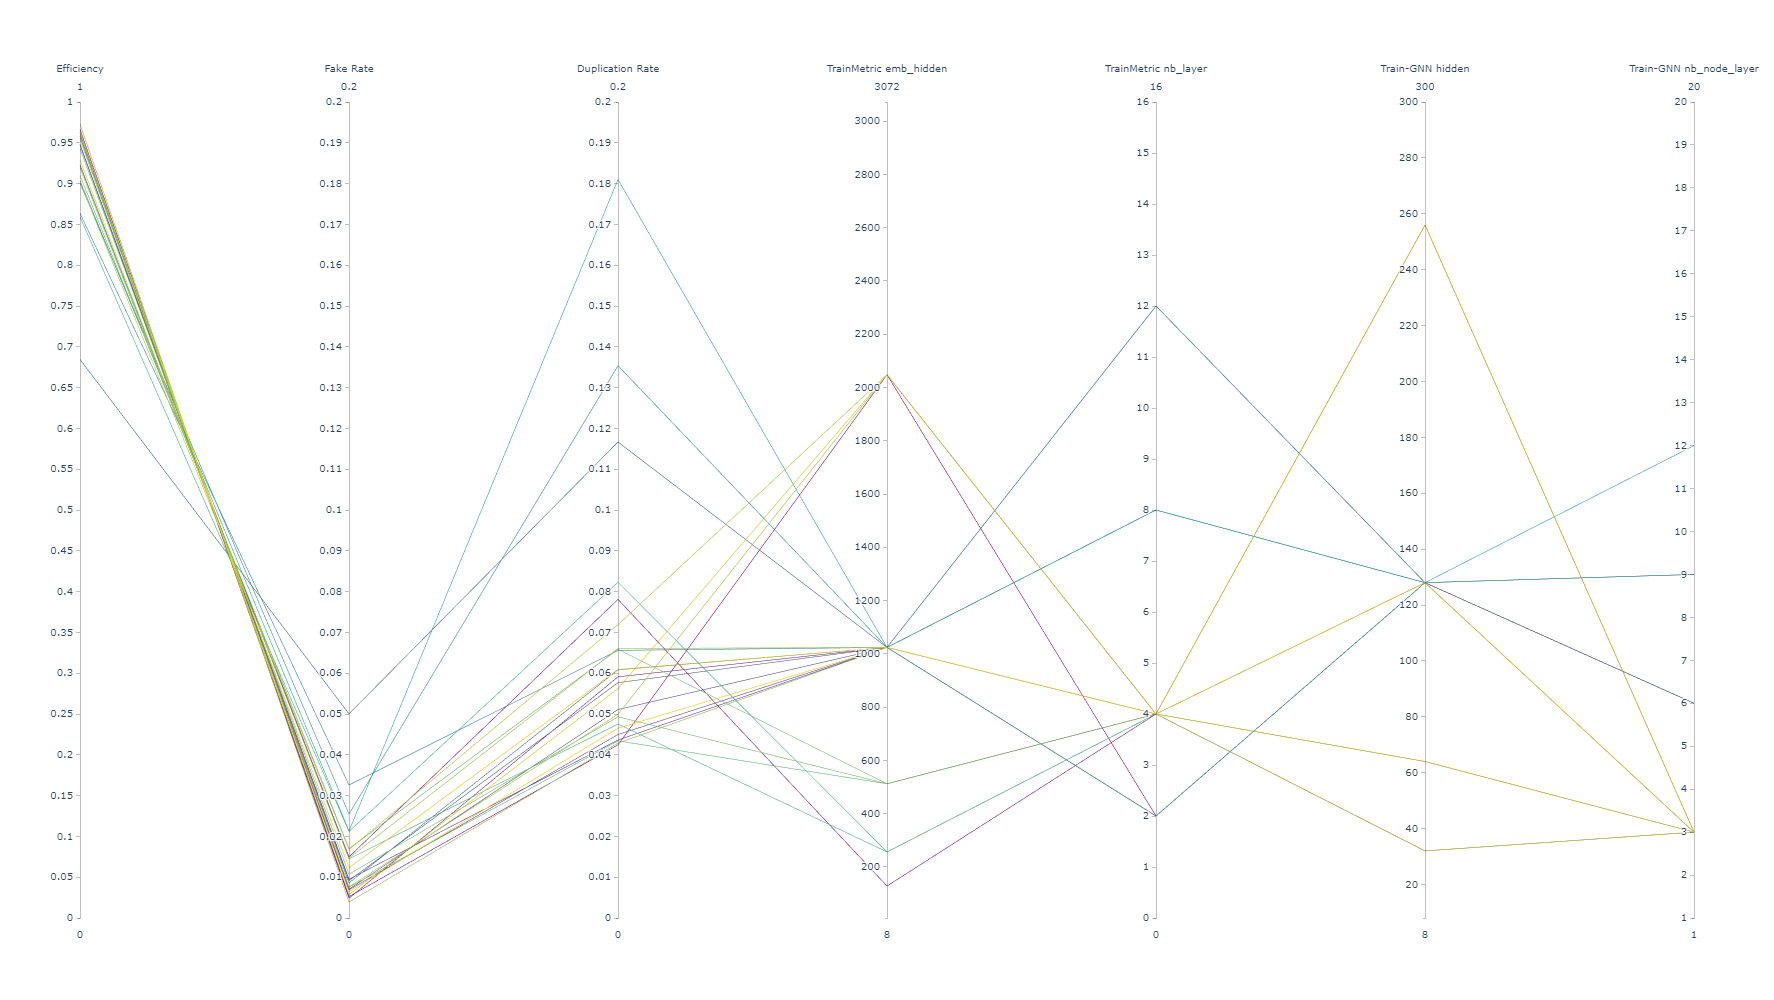

In [21]:
import plotly.graph_objects as go
import pandas as pd
df = rslt_df
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['id'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,1],                
                label = 'Efficiency', values = df['Efficiency']),
            dict(range = [0,0.2],
                label = 'Fake Rate', values = df['Fake Rate']),
            dict(range = [0,0.2],
                label = 'Duplication Rate', values = df['Duplication Rate']),
            dict(range = [8,3072],
                label = 'TrainMetric emb_hidden', values = df['(Train1) emb_hidden']),
            dict(range = [0,16],
                label = 'TrainMetric nb_layer', values = df['(Train1) nb_layer']),
            dict(range = [8,300],
                label = 'Train-GNN hidden', values = df['(TrainGNN) hidden']),   
            dict(range = [1,20],
                label = 'Train-GNN nb_node_layer', values = df['(TrainGNN) nb_node_layer'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    width=1500,
    height=1000
    
)

fig.show()

## Create Contour Surface Plots

### Create Surface plot for (TrainGNN) nb_node_layer, (Train1) nb_layer,  Duplication Rate

In [22]:

contour = df[['(TrainGNN) nb_node_layer', '(Train1) nb_layer', 'Duplication Rate']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) nb_layer',columns='(TrainGNN) nb_node_layer', values='Duplication Rate', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) nb_layer'].unique())
Y_unique = np.sort(contour['(TrainGNN) nb_node_layer'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

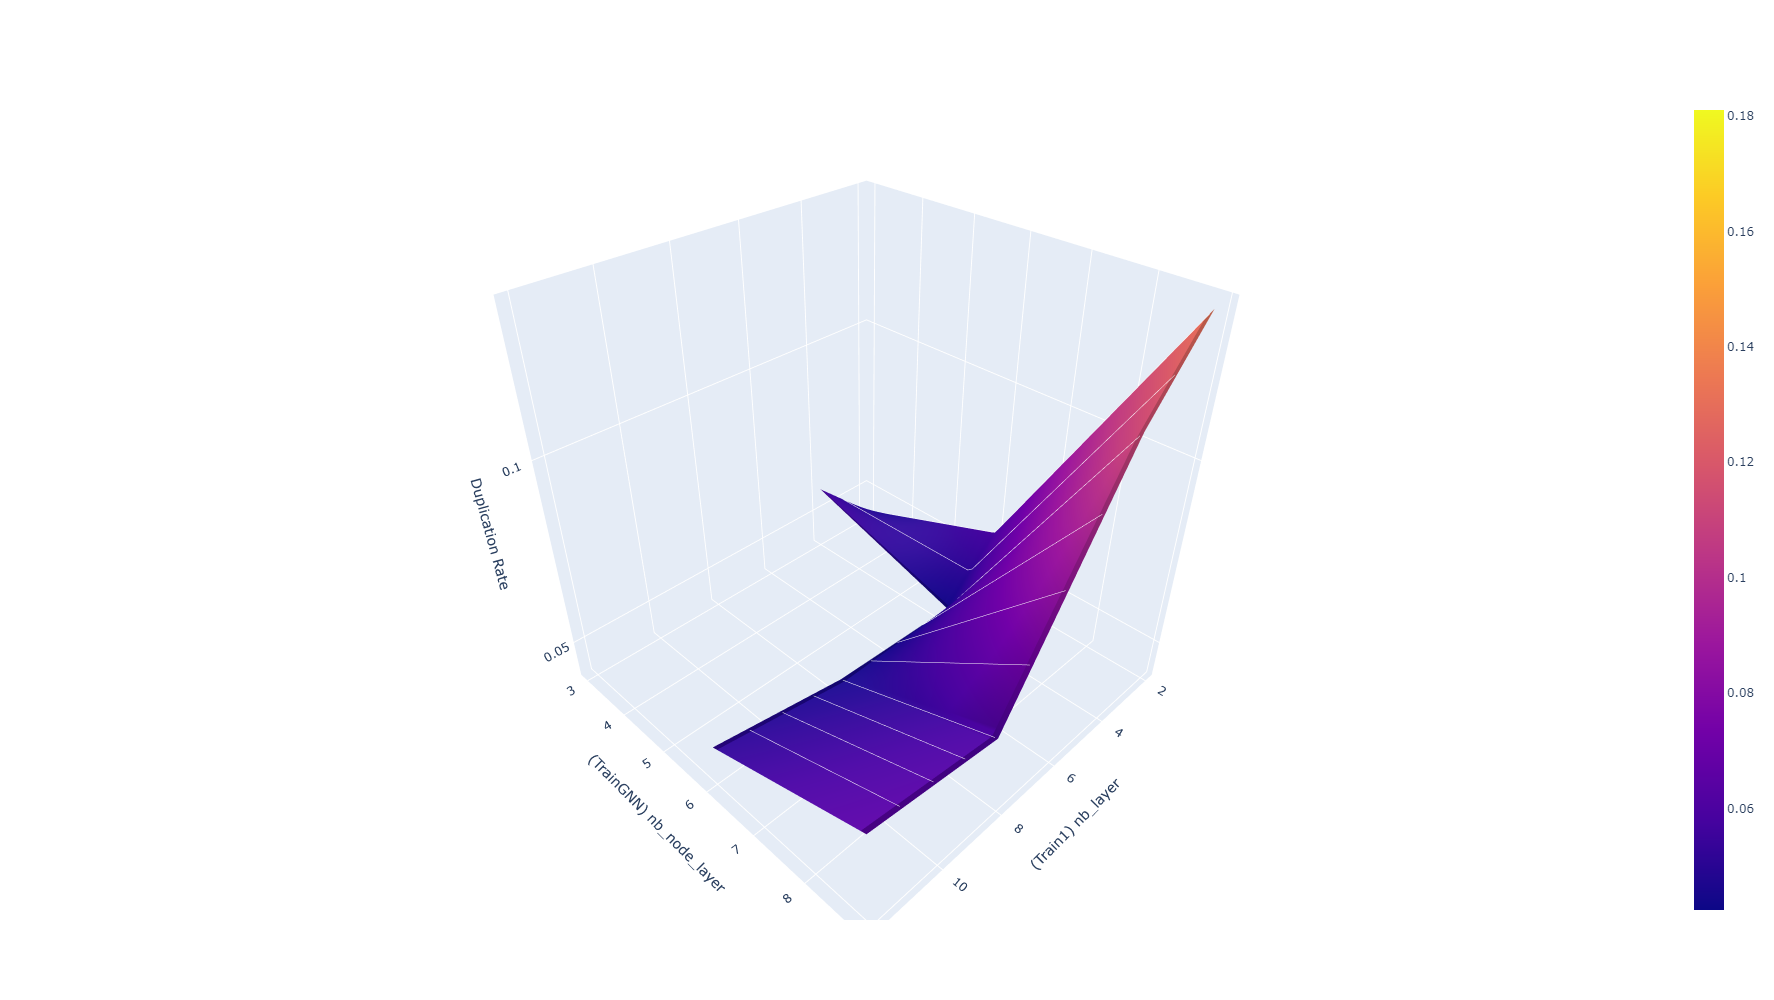

In [23]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 80000, "end": 140000, "size": 1000}
    },
    x = X_unique,
    y = Y_unique,
    z = Z))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) nb_layer"},
            "yaxis": {"title":"(TrainGNN) nb_node_layer"},
            "zaxis": {"title":"Duplication Rate"},
            
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 1}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Number of matched tracks vs (TrainGNN) nb_node_layer vs (Train1) nb_layer

In [24]:

contour = df[['(TrainGNN) nb_node_layer', '(Train1) nb_layer', 'Number of matched tracks']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) nb_layer',columns='(TrainGNN) nb_node_layer', values='Number of matched tracks', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) nb_layer'].unique())
Y_unique = np.sort(contour['(TrainGNN) nb_node_layer'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

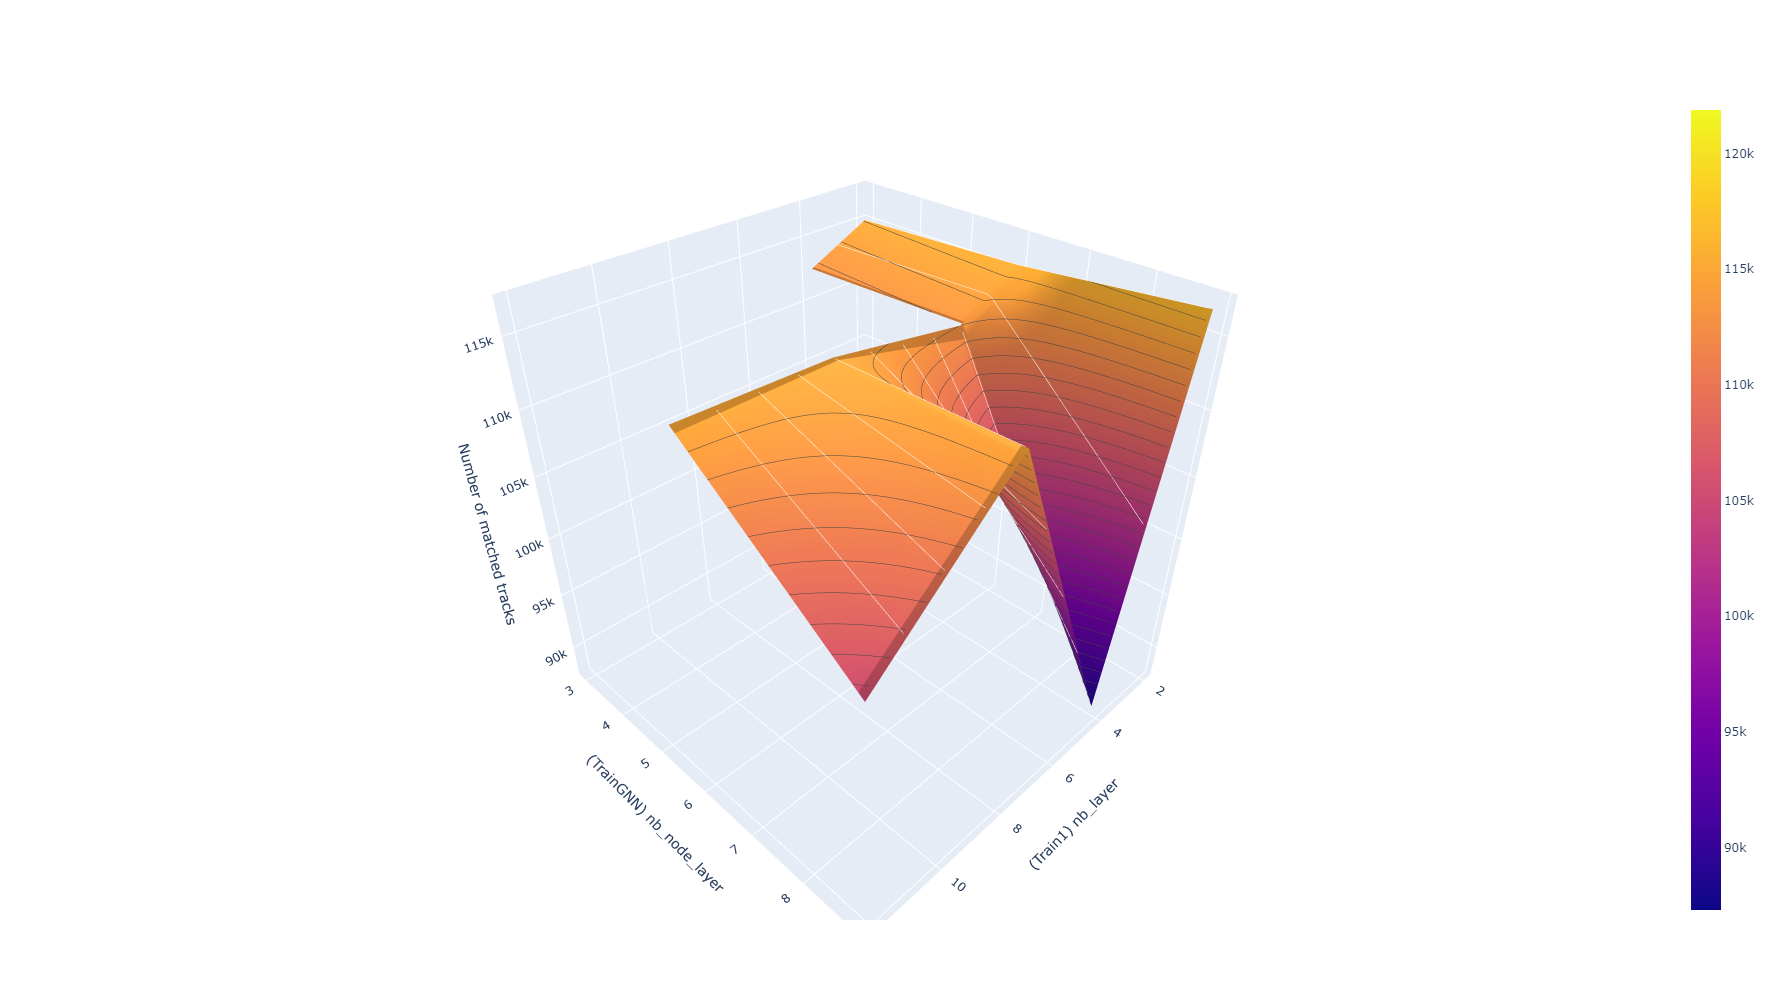

In [25]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 80000, "end": 140000, "size": 1000}
    },
    x = X_unique,
    y = Y_unique,
    z = Z))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) nb_layer"},
            "yaxis": {"title":"(TrainGNN) nb_node_layer"},
            "zaxis": {"title":"Number of matched tracks"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Efficiency vs (TrainGNN) nb_node_layer vs (Train1) nb_layer

In [26]:
contour = df[['(TrainGNN) nb_node_layer', '(Train1) nb_layer', 'Efficiency']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) nb_layer',columns='(TrainGNN) nb_node_layer', values='Efficiency', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) nb_layer'].unique())
Y_unique = np.sort(contour['(TrainGNN) nb_node_layer'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

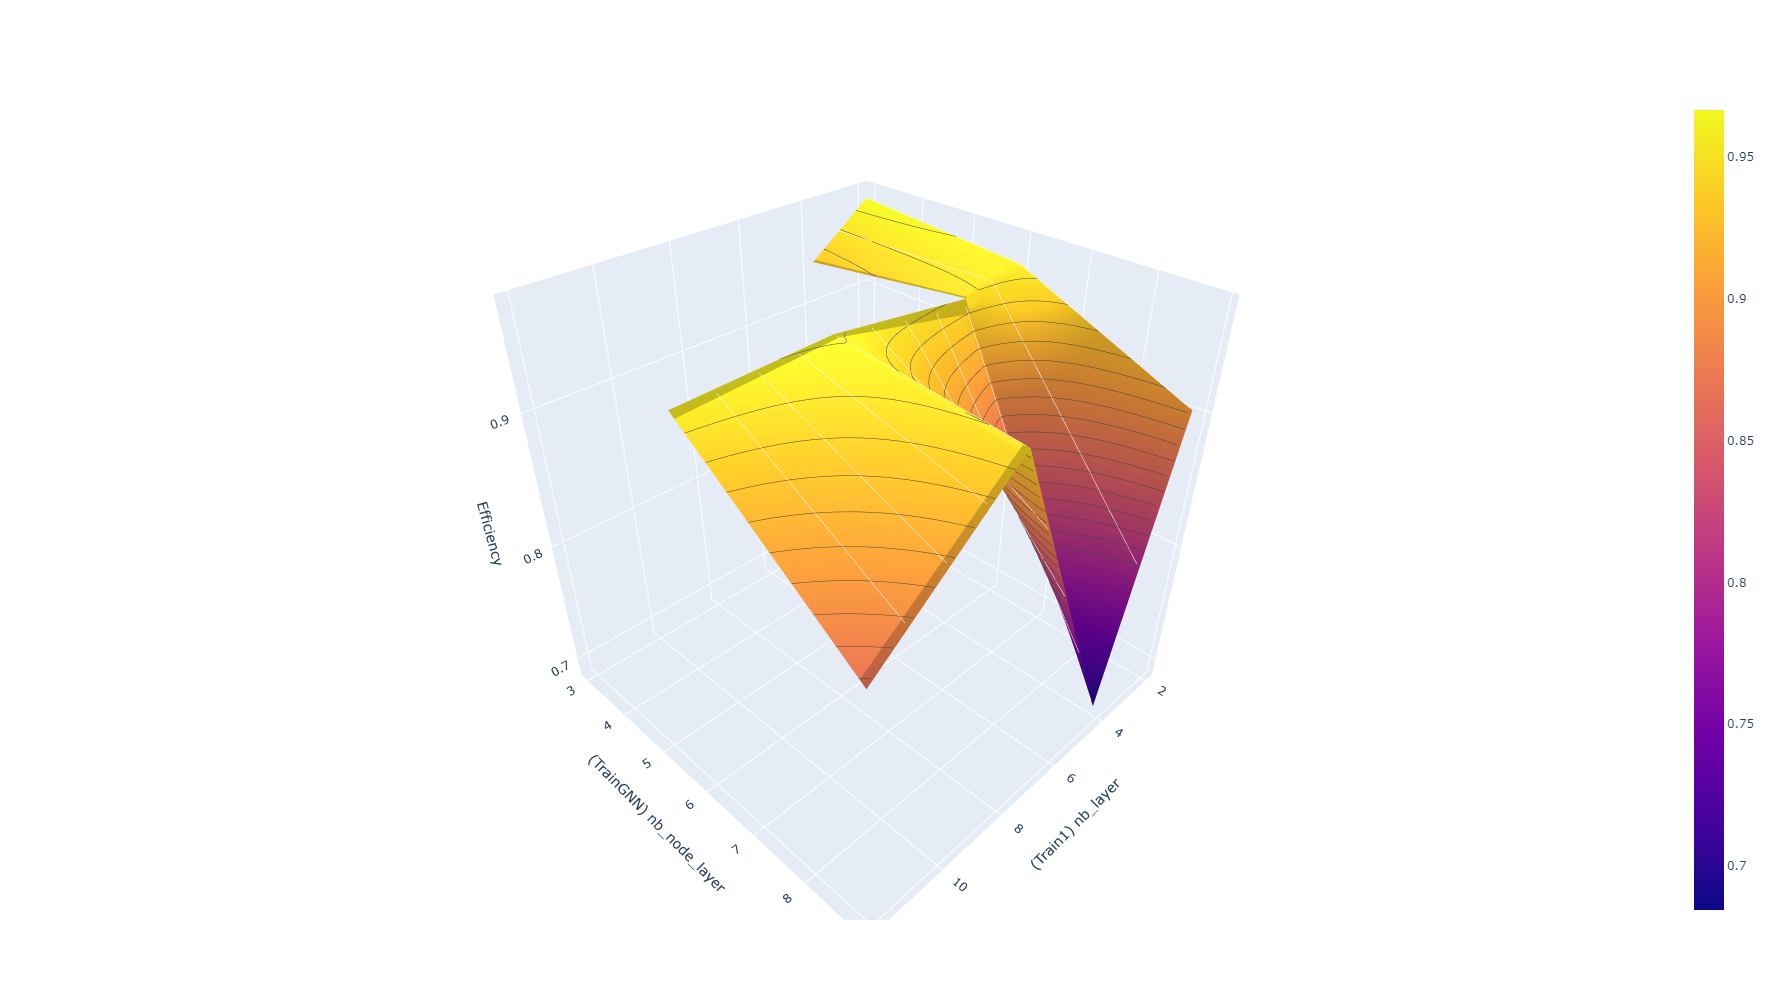

In [27]:


import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 0.8, "end": 1.0, "size": 0.01}
    },
    x = X_unique,
    y = Y_unique,
    z = Z))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) nb_layer"},
            "yaxis": {"title":"(TrainGNN) nb_node_layer"},
            "zaxis": {"title":"Efficiency"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Number of reconstructed particles vs (TrainGNN) nb_node_layer vs (Train1) nb_layer

In [28]:
contour = df[['(TrainGNN) nb_node_layer', '(Train1) nb_layer', 'Number of reconstructed particles']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) nb_layer',columns='(TrainGNN) nb_node_layer', values='Number of reconstructed particles', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) nb_layer'].unique())
Y_unique = np.sort(contour['(TrainGNN) nb_node_layer'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

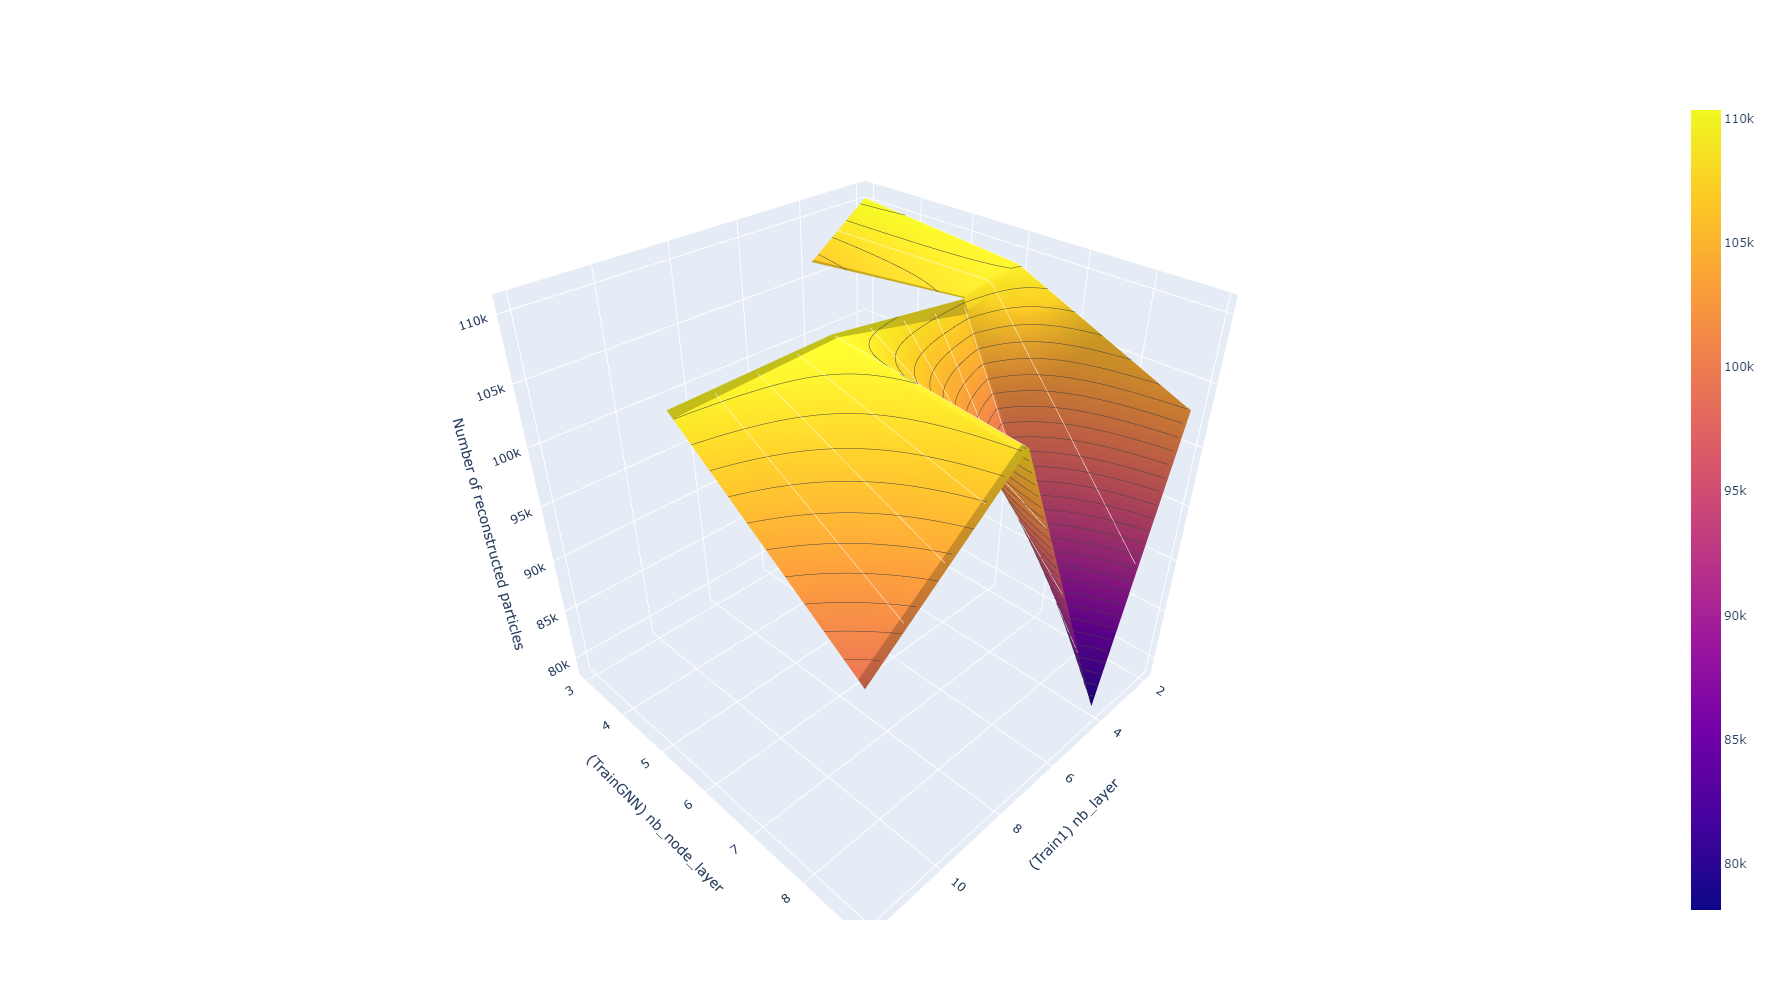

In [29]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 80000, "end": 140000, "size": 1000}
    },
    x = X_unique,
    y = Y_unique,
    z = Z))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) nb_layer"},
            "yaxis": {"title":"(TrainGNN) nb_node_layer"},
            "zaxis": {"title":"Number of reconstructed particles"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for (TrainGNN) hidden, (Train1) hidden,  Duplication Rate

In [37]:
contour = df[['(TrainGNN) hidden', '(Train1) emb_hidden', 'Duplication Rate']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) emb_hidden',columns='(TrainGNN) hidden', values='Duplication Rate', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) emb_hidden'].unique())
Y_unique = np.sort(contour['(TrainGNN) hidden'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

In [38]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 0.8, "end": 1.0, "size": 0.01}
    },
    x = [32, 64, 128, 256],
    y = [256, 512, 1024, 2048],
    z = [[0.072, 0.044, 0.041, 0.038],
        [0.058, 0.052, 0.044, 0.047],
        [0.06, 0.05, 0.084, 0.047],
        [0.056, 0.06, 0.044, 0.135]]))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) emb_hidden"},
            "yaxis": {"title":"(TrainGNN) hidden"},
            "zaxis": {"title":"Duplication Rate"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Number of matched tracks vs (TrainGNN) hidden vs (Train1) hidden

In [32]:
contour = df[['(TrainGNN) hidden', '(Train1) emb_hidden', 'Number of matched tracks']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) emb_hidden',columns='(TrainGNN) hidden', values='Number of matched tracks', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) emb_hidden'].unique())
Y_unique = np.sort(contour['(TrainGNN) hidden'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

In [33]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 80000, "end": 140000, "size": 1000}
    },
    x = [32, 64, 128, 256],
    y = [256, 512, 1024, 2048],
    z = [[104695, 109995, 111683, 113207],
        [107552, 114851, 114673, 116249],
         [111107, 112357, 117016, 115160],
         [107125, 105070, 115054, 95947]]))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) emb_hidden"},
            "yaxis": {"title":"(TrainGNN) hidden"},
            "zaxis": {"title":"Number of matched tracks"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Efficiency vs (TrainGNN) hidden vs (Train1) emb_hidden

In [34]:
contour = df[['(TrainGNN) hidden', '(Train1) emb_hidden', 'Efficiency']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) emb_hidden',columns='(TrainGNN) hidden', values='Efficiency', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) emb_hidden'].unique())
Y_unique = np.sort(contour['(TrainGNN) hidden'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

In [35]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 0.8, "end": 1.0, "size": 0.01}
    },
     x = [32, 64, 128, 256],
    y = [256, 512, 1024, 2048],
    z = [[0.856, 0.922, 0.939, 0.955],
        [0.89, 0.956, 0.961, 0.972],
        [0.918, 0.937, 0.945, 0.963],
        [0.888, 0.868, 0.965, 0.74]]))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) emb_hidden"},
            "yaxis": {"title":"(TrainGNN) hidden"},
            "zaxis": {"title":"Efficiency"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()

### Create Surface plot for Number of reconstructed particles vs (TrainGNN) nb_node_layer vs (Train1) nb_layer

In [59]:
contour = df[['(TrainGNN) hidden', '(Train1) emb_hidden', 'Number of reconstructed particles']].copy()
#display(contour)
Z = contour.pivot_table( index='(Train1) emb_hidden',columns='(TrainGNN) hidden', values='Number of reconstructed particles', aggfunc='mean').T
#display(Z)

X_unique = np.sort(contour['(Train1) emb_hidden'].unique())
Y_unique = np.sort(contour['(TrainGNN) hidden'].unique())
X, Y = np.meshgrid(X_unique, Y_unique)

In [36]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(
    contours = {
        "x": {"show": True, "start": 0, "end": 15, "size": 1, "color":"white"},
        "z": {"show": True, "start": 0.8, "end": 1.0, "size": 0.01}
    },
    x = [32, 64, 128, 256],
    y = [256, 512, 1024, 2048],
    z = [[97669, 105286, 107227, 109028],
        [101587, 109101, 109767, 110988],
        [104824, 106969, 107878, 109934],
        [101378, 99075, 110141, 84472]]))
fig.update_layout(
        scene = {
            "xaxis": {"title":"(Train1) emb_hidden"},
            "yaxis": {"title":"(TrainGNN) hidden"},
            "zaxis": {"title":"Number of reconstructed particles"}
            #"zaxis": {"nticks": 3},
            #'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            #"aspectratio": {"x": 1, "y": 1, "z": 0.2}
        },
        width=1000,
        height=1000)
fig.show()